<a href="https://colab.research.google.com/github/BbangB/ML_basic/blob/main/ML_basic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent

In [5]:
import warnings
warnings.filterwarnings('ignore')

##numpy Package

In [7]:
import numpy as np

## def Machine

In [9]:
def Machine(x,w,b):
    y_hat = (w*x)+b
    return y_hat

## x,w,b  select

In [11]:
x = np.array([1,3,5,7,9])
w =2
b=1


# Test

In [12]:
Machine(x,w,b)

array([ 3,  7, 11, 15, 19])

## Gradient Define

In [15]:
def Gradient(x,y,w,b):
    y_hat = Machine(x,w,b)

    dw = np.mean((y-y_hat)*(-2*x))
    db = np.mean((y-y_hat)*-2)

    return dw, db
    

## Test

In [17]:
y= np.array([2,4,6,8,10])

dw, db = Gradient(x,y,w,b)

In [18]:
print('dw is ',dw)
print('db is ',db)

dw is  66.0
db is  10.0


## Learning Define

In [19]:
def Learning(x,y,w,b,step):
    dw, db = Gradient(x,y,w,b)

    uw = w - step*dw
    ub = b - step*db

    return uw, ub



## Test

In [20]:
step = 0.05
uw,ub = Learning(x,y,w,b,step)


In [22]:
print('Updated w is', '%.3f' %uw)
print('Updated b is', '%.3f' %ub)


Updated w is -1.300
Updated b is 0.500


## Apply to TestData.csv

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

DATA = pd.read_csv(url)

In [26]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [27]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


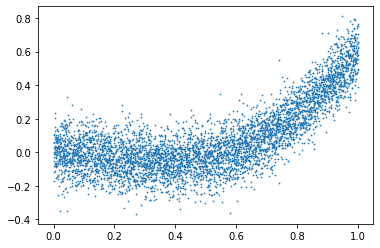

In [30]:
plt.scatter(DATA.inputs, DATA.outputs, s =0.5)

## 1500 times Learning

In [32]:
w = 2
b = 3
step = 0.05

In [33]:
for i in range(0,1500):
    uw , ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = uw
    b = ub


In [35]:
print('Learned_w is', '%.3f' %w)
print('Learned_b is', '%.3f' %b)

Learned_w is 0.505
Learned_b is -0.170


## Graph

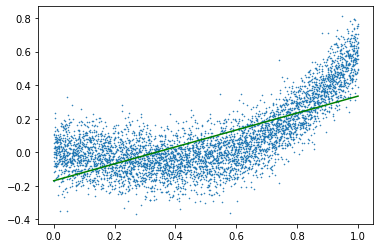

In [38]:
X = np.linspace(0,1,100)
Y = (w*X) +b

plt.scatter(DATA.inputs,DATA.outputs,s = 0.3 )
plt.plot(X,Y,'-g', linewidth = 1.5)
plt.show()

## Graph

In [40]:
def Gradient(x,y,w,b):
    y_hat = Machine(x,w,b)

    dw = np.mean((y-y_hat)*(-2*x))
    db = np.mean((y-y_hat)*(-2))
    Loss = np.mean((y-y_hat)**2)

    return dw, db, Loss

In [41]:
def Learning(x,y,w,b,step):
    dw, db, Loss = Gradient(x,y,w,b)

    uw = w - step*dw
    ub = b - step*db

    Loss = Loss

    return uw,ub,Loss


In [42]:
w=2
b=3
step = 0.001
Error= []

In [43]:
for i in range(0,1500):
    uw, ub, Loss = Learning(DATA.inputs, DATA.outputs, w, b, step)

    w = uw
    b = ub
    Error.append(Loss)

In [44]:
Error[0:10]

[15.595575679087696,
 15.516493615452518,
 15.437813155278901,
 15.359532259084617,
 15.28164889774523,
 15.204161052440144,
 15.127066714601533,
 15.050363885861731,
 14.97405057800144,
 14.898124812898125]

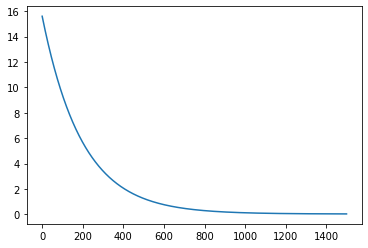

In [45]:
plt.plot(Error)
plt.show()

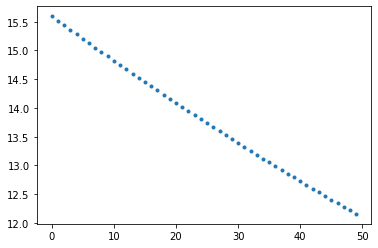

In [46]:
plt.plot(Error[0:50], '.')

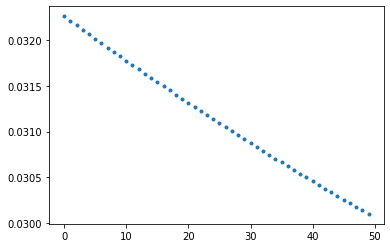

In [47]:
plt.plot(Error[1450:1500], '.')
plt.show()


##The End##